In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*.txt")
    return files
textfile=textfile()
textfile

['./files\\20111008大同.txt',
 './files\\20140429台紙.txt',
 './files\\20140613台紙.txt',
 './files\\20140619台紙.txt',
 './files\\20140728台紙.txt',
 './files\\20140814大同.txt',
 './files\\20150615大同.txt',
 './files\\20160217台苯.txt',
 './files\\20160309台苯.txt',
 './files\\20160314台苯.txt',
 './files\\20160322台苯.txt',
 './files\\20160401台苯.txt',
 './files\\20160411台苯.txt',
 './files\\20160618大同.txt',
 './files\\20160924台紙.txt',
 './files\\20160928大同.txt',
 './files\\20161018台紙.txt',
 './files\\20170209台紙.txt',
 './files\\20170216榮剛.txt',
 './files\\20170302台紙.txt',
 './files\\20170426台紙.txt',
 './files\\20170506大同.txt',
 './files\\20170628台紙.txt',
 './files\\20170921台苯.txt',
 './files\\20171207榮剛.txt',
 './files\\20171215榮剛.txt',
 './files\\20171225榮剛.txt',
 './files\\20171227榮剛.txt',
 './files\\20171228榮剛.txt',
 './files\\20171230榮剛.txt',
 './files\\20180117榮剛.txt',
 './files\\20180122榮剛.txt',
 './files\\20180123榮剛.txt',
 './files\\20180228大同.txt',
 './files\\20180323大同.txt',
 './files\\20180327台

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['股東臨時會','智冠','大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.934 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '台灣',
 '之爭',
 '表示',
 '億元',
 '今年',
 '指出',
 '記者',
 '台紙',
 '智冠',
 '榮剛',
 '台苯',
 '遊戲',
 '目前',
 '去年']

In [5]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [6]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['台湾 董事 林蔚山 挪用 亿求 刑年 坚信 老董 清白 来源 台海 网 刘强 用 手持 设备 访问 台海 网月 日讯 据 台湾 联合报 报道 台湾 集团 董事长 林蔚山 被控 擅自 挪用 资金 达 亿元 新台币 下同 以 填补 私人 投资 通达 国际 昨天 新北市 板桥 检方 依 违反 台湾 证券交易 法 及 背信 罪 起诉 林蔚山 通达 国际 执行长 周云楠 两人 都 求刑 据 台媒 了解 同案 被 起诉 有人 包括 台湾 前 财务 长许 嘉成 子公司 尚志 资产 主计长 黄仁宏 等 重要 财务 干部 另有 五名 通达 职员 认罪 配合 调查 检方 建请 从轻 量刑 或 缓刑 板桥 检方 一年 多前 侦办 生产 笔记本电脑 通达 国际 伪造文书 案时 意外 查 到 台湾 集团 董事长 林蔚山 在 年前 以 个人 名义 投资 担任 通达 董事 及 连带保证 而后 通达 因 经营不善 亏损 连 连 过去 多来 林蔚山 为 要 补 这个 钱坑 及 避免 个人 遭 银行 催收 巨额 债务 陆续 安排 台湾 子公司 尚志 投资 入主 通达 并 取得 经营权 再 以 借款 名义 挪用 台湾 集团 资金 挹注 亏损 通达 后来 林蔚山 将 借款 改为 投资 款 并 将 挹注 通达 多亿元 转嫁 为 台湾 集团 呆帐 并 在 缴清 债务 和 贷款 后 解散 通达 检方 林蔚山 年前 为 投资 另一家 科技 要求 周云楠 指示 通达 财务人员 挪用 通达 账户 万元 汇入 这家 科技 账户 使林 成为 这家 科技 股东 对 资金 已 短少 通达 更是 雪上加霜 检调 搜索 通达 过滤 比 对 通达 帐目 后 林蔚山 才 以 返还 借款 为 由 在 去 年月日 和 日 将 借款 本金 和 利息 万元 汇入 通达 账户 坚信 老董 清白 另据 台湾 经济日报 报道 日 晚间 紧急 与 律师团 研商 对应 之策 并 发出 声明 稿 林蔚山 尚未 接获 起诉书 无从 为 任何 评论 但 坚决 相信 并 支持 林蔚山 清白 林蔚山 为 受害人 通达 案仅经 一次 开庭 相关 证据 调查 未臻 详实 且 未 给予 充分 答辩 机会 令人遗憾 强调 相信 经 司法 审理 在 充分 详查 整体 过程 后 定能 还 林蔚山 清白 林蔚山 将 继续 向 司法机关 提出 说明 以 还原 事实真相 及

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  5241


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (50, 5241)


<50x5241 sparse matrix of type '<class 'numpy.float64'>'
	with 9983 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
万元 0.06652844451672334 0 102
个人 0.099792666775085 0 285
亏损 0.06652844451672334 0 408
借款 0.12032888276797157 0 664
债务 0.06652844451672334 0 670
充分 0.06016444138398579 0 750
台海 0.06652844451672334 0 1240
台湾 0.33264222258361664 0 1241
名义 0.06652844451672334 0 1311
周云楠 0.06652844451672334 0 1351
国际 0.099792666775085 0 1477
坚信 0.06652844451672334 0 1537
投资 0.16632111129180832 0 2399
报道 0.06652844451672334 0 2406
挪用 0.13305688903344667 0 2453
挹注 0.06016444138398579 0 2454
板桥 0.06652844451672334 0 2980
林蔚山 0.32190827278228035 0 3007
检方 0.19958533355017 0 3042
求刑 0.06652844451672334 0 3176
汇入 0.06652844451672334 0 3178
清白 0.16632111129180832 0 3278
相信 0.052146745644153725 0 3630
科技 0.05572418339837633 0 3725
老董 0.06016444138398579 0 4020
董事长 0.06652844451672334 0 4225
调查 0.06652844451672334 0 4458
财务 0.099792666775085 0 4557
账户 0.099792666775085 0 4559
资金 0.099792666775085 0 4562
起诉 0.06652844451672334 0 4579
这家 0.099792666775085 0 4664
通达 0.5654917783921484 0 4726
集团 0.1330

金融 0.054763700999150275 3 4918
開發 0.13018816661996205 3 4975
預估 0.06685239689539328 3 5121
驚人 0.07392383067731717 3 5174
高爾夫 0.054763700999150275 3 5195
----Document 4----
一步 0.086118540315743 4 60
三井 0.05147730667215429 4 105
不能 0.12104780310040855 4 223
不超過 0.05147730667215429 4 236
不過 0.050973863476035296 4 242
享受 0.05147730667215429 4 453
京城 0.21757756166402792 4 454
來應 0.05147730667215429 4 617
備汰 0.05147730667215429 4 692
價值 0.10878878083201396 4 718
優先 0.05147730667215429 4 730
優化現 0.05147730667215429 4 732
先以 0.05147730667215429 4 752
先設 0.05147730667215429 4 761
公布 0.086118540315743 4 837
其餘 0.05147730667215429 4 882
到位 0.05147730667215429 4 969
力拼 0.13965921294479228 4 1034
募集 0.05147730667215429 4 1057
半開 0.05147730667215429 4 1105
反問 0.05147730667215429 4 1172
反而 0.05147730667215429 4 1177
取得 0.07053958401471183 4 1181
受訪 0.05147730667215429 4 1193
周邊 0.05147730667215429 4 1356
商品 0.10295461334430858 4 1377
因新 0.05147730667215429 4 1465
基本 0.05147730667215429 4 1549
報告 0.05

繼續 0.08387851149422834 6 3960
股價 0.08083790874547636 6 4064
股東 0.11447444758156784 6 4079
股東常會 0.11311018563137121 6 4083
華亞科 0.06761154673711983 6 4198
華映 0.15026244564208563 6 4201
處理華映 0.13522309347423966 6 4263
虧損 0.18877129712941018 6 4270
表現 0.06761154673711983 6 4290
要求 0.11326277827764611 6 4310
許多 0.05299570966854838 6 4364
財務長 0.06114393580212943 6 4481
資華映 0.06761154673711983 6 4523
轉投 0.06114393580212943 6 4625
連續 0.050087481880695214 6 4739
過去 0.08387851149422834 6 4780
除了 0.08083790874547636 6 5011
面板 0.27044618694847933 6 5103
韓國 0.20283464021135947 6 5112
高層 0.056555092815685604 6 5184
----Document 7----
一樁 0.05912089345391489 7 56
一言堂 0.05912089345391489 7 79
三分 0.05912089345391489 7 110
下來 0.05346548464518527 7 163
不慣 0.05912089345391489 7 206
不該 0.05912089345391489 7 231
且還 0.05912089345391489 7 251
中國 0.08759499885890701 7 288
主管 0.08329482557576387 7 327
事後發 0.05912089345391489 7 374
人選 0.10693096929037053 7 482
介紹 0.05912089345391489 7 495
他聘 0.05912089345391489 7

開文 0.050811452638070076 8 4972
開發案 0.050811452638070076 8 4976
開除 0.050811452638070076 8 4981
閱孫 0.050811452638070076 8 4984
雙方展 0.050811452638070076 8 5054
非必要 0.050811452638070076 8 5096
面子 0.050811452638070076 8 5100
韋樞 0.050811452638070076 8 5111
頓雜誌 0.050811452638070076 8 5128
高價 0.050811452638070076 8 5182
----Document 9----
下六輕 0.09233367918809274 9 164
不然 0.09233367918809274 9 216
不覺 0.09233367918809274 9 228
中國 0.15127457605208514 9 288
公投 0.09233367918809274 9 839
其實 0.06103680957418171 9 873
募款 0.09233367918809274 9 1056
台苯經 0.053943102875950326 9 1258
同志 0.09233367918809274 9 1304
同意 0.056727966019531915 9 1305
吳清典 0.10306148938674582 9 1339
呂秋遠 0.06925025939106956 9 1346
因六輕 0.09233367918809274 9 1456
團隊 0.1031465695119867 9 1513
夏珍 0.06925025939106956 9 1593
好勵 0.09233367918809274 9 1723
好心 0.09233367918809274 9 1727
學童 0.09233367918809274 9 1789
宜蘭 0.09233367918809274 9 1809
害死 0.09233367918809274 9 1820
專家 0.08002901335492103 9 1906
小熊 0.09233367918809274 9 1945
就是 0.05

諧共治 0.11675341982832073 11 4409
講求 0.11675341982832073 11 4416
議事 0.05279248849621874 11 4437
議案 0.05279248849621874 11 4439
責任 0.058376709914160364 11 4492
較林 0.058376709914160364 11 4613
進黨 0.15837746548865622 11 4760
運作 0.05279248849621874 11 4768
選後搬 0.058376709914160364 11 4825
重點將 0.058376709914160364 11 4903
雙方 0.059475682424053704 11 5049
青為 0.058376709914160364 11 5093
高雄林園 0.058376709914160364 11 5209
黨勝 0.058376709914160364 11 5227
----Document 12----
下六輕 0.09382645726407146 12 164
不然 0.09382645726407146 12 216
不覺 0.09382645726407146 12 228
中國 0.15372026404555839 12 288
代表人 0.05236385311701129 12 512
公投 0.09382645726407146 12 839
其實 0.06202360455474799 12 873
募款 0.09382645726407146 12 1056
同志 0.09382645726407146 12 1304
同意 0.05764509901708439 12 1305
吳乃仁 0.1279021622745764 12 1326
吳怡青 0.0813228593018054 12 1336
吳逸驊 0.051875560652633136 12 1342
呂秋遠 0.07036984294805361 12 1346
因六輕 0.09382645726407146 12 1456
國家 0.06099214447635405 12 1485
執行長 0.07036984294805361 12 1547
夏珍 0.0

什麼 0.06284104815058227 15 488
假如 0.08444975733863536 15 674
傳媒 0.09338258390361454 15 696
出現 0.06578288641839396 15 921
分析 0.06578288641839396 15 936
創立 0.07319572681714442 15 1019
力圖 0.08444975733863536 15 1033
半導體 0.09338258390361454 15 1100
即時 0.08444975733863536 15 1128
及其 0.08444975733863536 15 1153
取自 0.08444975733863536 15 1185
受不了 0.09338258390361454 15 1186
可以 0.057924958940628296 15 1216
同等 0.09338258390361454 15 1310
命運 0.09338258390361454 15 1363
嚴重 0.06578288641839396 15 1415
因為 0.05214479580335726 15 1469
圖擷 0.09338258390361454 15 1499
大漲 0.1562236320541968 15 1654
子公司 0.15153635562563347 15 1755
宣示 0.0781118160270984 15 1817
宣稱 0.08444975733863536 15 1818
將力爭 0.09338258390361454 15 1866
小股 0.0781118160270984 15 1947
尚志 0.13835797892423846 15 1951
幾十億 0.09338258390361454 15 2088
引發 0.07319572681714442 15 2128
得到 0.08444975733863536 15 2185
志在必得 0.08444975733863536 15 2214
成功 0.06578288641839396 15 2287
扭轉 0.09338258390361454 15 2370
控有 0.08444975733863536 15 2497
擁有 0.115

經營權 0.0604816829113236 18 3912
經理人 0.07639771105514963 18 3920
股權 0.08144355252650513 18 4092
肯定 0.07639771105514963 18 4101
脫鋼 0.10312691350540958 18 4118
興時 0.06165044600714648 18 4162
董事 0.0992470634653218 18 4224
證實 0.08626266439030546 18 4432
財訊 0.1616671776019482 18 4488
起開 0.10312691350540958 18 4581
超過 0.06396933968587001 18 4584
轉型 0.07264722986042058 18 4622
退出 0.08626266439030546 18 4672
過面 0.10312691350540958 18 4789
金智富 0.07264722986042058 18 4911
鋼廠 0.08626266439030546 18 4936
鋼等 0.10312691350540958 18 4940
鋼鐵 0.39919654631996265 18 4943
鋼鐵廠 0.10312691350540958 18 4944
鋼鐵自 0.10312691350540958 18 4947
鋼電爐 0.10312691350540958 18 4949
關鍵 0.07639771105514963 18 4991
集團 0.09183605482032124 18 5040
預期 0.08626266439030546 18 5125
----Document 19----
一九九 0.0748188013528185 19 2
一二 0.05611410101461387 19 7
一家 0.05864494550996381 19 40
七五 0.05611410101461387 19 92
七八 0.0748188013528185 19 96
三元 0.11222820202922774 19 108
三十一 0.0748188013528185 19 112
三座 0.05611410101461387 19 129
九

檢附 0.06366869146854617 21 3089
欣同 0.17273474302671493 21 3103
欣同會 0.06366869146854617 21 3104
氣也 0.06366869146854617 21 3163
派採 0.06366869146854617 21 3239
涉及 0.05757824767557164 21 3261
無恐 0.06366869146854617 21 3336
無法 0.07898702702263345 21 3338
現增 0.05757824767557164 21 3469
現身 0.05757824767557164 21 3479
甘心 0.06366869146854617 21 3493
當天 0.06366869146854617 21 3545
疏失 0.06366869146854617 21 3558
發揮 0.05325700903511482 21 3576
監督 0.06366869146854617 21 3617
私募 0.15977102710534447 21 3720
積極動員 0.06366869146854617 21 3737
竟未 0.06366869146854617 21 3761
競爭席 0.06366869146854617 21 3766
經營權 0.05601044593336213 21 3912
緊急 0.06366869146854617 21 3938
縮會 0.06366869146854617 21 3942
股權 0.05028177651840988 21 4092
董事 0.19913836220313458 21 4224
處分 0.08569065320336698 21 4260
處罰 0.06366869146854617 21 4264
行為 0.06366869146854617 21 4282
表明 0.05757824767557164 21 4288
裁定 0.17273474302671493 21 4295
語帶 0.05757824767557164 21 4394
足以 0.06366869146854617 21 4593
轉折 0.06366869146854617 21 4628
轉讓 

還將 0.06651892842339166 23 4841
配發 0.05181550842831541 23 4872
重回 0.14711017794326034 23 4883
鐵漢出 0.07355508897163017 23 4957
雖因 0.07355508897163017 23 5044
青及 0.07355508897163017 23 5089
青擔 0.07355508897163017 23 5091
順勢 0.06651892842339166 23 5119
----Document 24----
上述 0.06037666507063825 24 161
下列 0.06676311654953558 24 165
不但 0.0558454056346924 24 178
不銹 0.06676311654953558 24 244
交易 0.09406187597998349 24 441
人事 0.1116908112693848 24 458
人外 0.06676311654953558 24 466
使榮剛 0.06676311654953558 24 611
依法 0.052330687759345976 24 633
價格 0.09891790831159016 24 721
全年 0.06037666507063825 24 790
全體 0.0558454056346924 24 800
出售 0.09406187597998349 24 910
前三季 0.06037666507063825 24 979
包括 0.06099053185931928 24 1063
及陳驥智 0.1207533301412765 24 1162
召集 0.06037666507063825 24 1213
台鋼 0.09406187597998349 24 1261
嚴重 0.18812375195996697 24 1415
因股權 0.06676311654953558 24 1472
增資 0.0558454056346924 24 1584
大幅 0.09891790831159016 24 1640
將於月 0.0558454056346924 24 1880
將有 0.06037666507063825 24 1884


異樣 0.06420429893421693 26 3538
發財 0.06420429893421693 26 3588
盡力 0.06420429893421693 26 3608
看不出 0.05806261979951441 26 3647
矗立 0.06420429893421693 26 3675
知識庫 0.12840859786843387 26 3678
短短 0.05806261979951441 26 3681
究竟 0.053705029105585333 26 3743
空中巴士 0.06420429893421693 26 3744
箭在弦上 0.06420429893421693 26 3801
絲毫 0.06420429893421693 26 3903
經營 0.09802080879052322 26 3910
經達成 0.06420429893421693 26 3923
翻臉 0.11612523959902882 26 4000
聯合 0.10741005821117067 26 4043
股東臨時會 0.13082595779328854 26 4090
股權 0.07605715154660443 26 4092
興時 0.15352825098030312 26 4162
董事 0.06178879900964427 26 4224
裕民 0.16111508731675597 26 4298
視為 0.06420429893421693 26 4319
變成 0.15097505751583679 26 4445
負責 0.050325019171945595 26 4475
起落架 0.06420429893421693 26 4577
這家 0.10741005821117067 26 4697
這對 0.06420429893421693 26 4698
週刊 0.05806261979951441 26 4745
週四 0.06420429893421693 26 4746
進出 0.05806261979951441 26 4750
遠超過 0.06420429893421693 26 4809
還曾 0.06420429893421693 26 4845
醒目 0.06420429893421693 26

擱置 0.07358735585906616 29 2573
日舉行 0.0665481087126933 29 2736
會中 0.09982216306903996 29 2857
每股 0.06372114563102624 29 3147
比重 0.05183823867310567 29 3151
獨董 0.18396838964766538 29 3426
發熹 0.16637027178173325 29 3580
發生 0.05183823867310567 29 3582
知道 0.1362860905833885 29 3679
福利 0.0665481087126933 29 3711
私募 0.06155368337972825 29 3720
簡金成 0.1362860905833885 29 3809
經理 0.07428001635058552 29 3919
總經理 0.07989422198929785 29 3947
而且 0.0545144362333554 29 4024
股東臨時會 0.056229507631578676 29 4090
股票 0.07088303321528928 29 4096
興時 0.37392657083798486 29 4162
萬元 0.0545144362333554 29 4205
董之爭 0.07358735585906616 29 4223
董事 0.22130889287713856 29 4224
薪水 0.1538842084493206 29 4245
薪資 0.11038103378859923 29 4246
薪資水準 0.07358735585906616 29 4247
薪酬 0.0665481087126933 29 4248
藉此 0.07358735585906616 29 4249
討論 0.08651955918593478 29 4357
調薪 0.18396838964766538 29 4403
調薪案 0.11038103378859923 29 4404
財訊 0.11535941224791303 29 4488
賣給 0.07358735585906616 29 4540
迄今 0.0665481087126933 29 4644
通過 0.1

吳國賢 0.06713747271439253 32 1331
團隊 0.155029411459443 32 1513
外資則 0.06713747271439253 32 1601
外部 0.06071521093174896 32 1603
審核 0.06071521093174896 32 1849
市場 0.12053007524244001 32 2024
師蘇秀龍 0.06713747271439253 32 2038
廠長 0.12143042186349792 32 2103
從榮剛 0.06713747271439253 32 2193
忽略 0.06071521093174896 32 2219
思維 0.06071521093174896 32 2221
或是 0.05615854368094842 32 2304
技術 0.05615854368094842 32 2383
投票 0.05262411797330821 32 2386
採購 0.13427494542878507 32 2482
接任 0.09947256379660971 32 2484
推選榮剛 0.06713747271439253 32 2509
損及 0.05615854368094842 32 2543
政祥 0.06713747271439253 32 2630
新任 0.13553884394251298 32 2671
明確 0.05615854368094842 32 2752
時應 0.06071521093174896 32 2774
時興 0.06713747271439253 32 2778
時間 0.08027109502153017 32 2780
曾埜觀 0.06713747271439253 32 2824
最後股 0.06713747271439253 32 2844
會將 0.06713747271439253 32 2862
李宜 0.06071521093174896 32 2952
李宜儒 0.06713747271439253 32 2953
李郁 0.06713747271439253 32 2955
林嘉洪 0.06071521093174896 32 2985
根據 0.09035922929500864 32 3024

突擊 0.09187469792641749 35 3748
綠營 0.11527576988093678 35 3926
維護 0.09187469792641749 35 3929
職位 0.13612385723331885 35 4051
臨時 0.05698962143265742 35 4126
臨走 0.09187469792641749 35 4129
草根 0.09187469792641749 35 4193
董事 0.11052272469448676 35 4224
裝潢 0.09187469792641749 35 4302
觀漢陣營 0.09187469792641749 35 4333
解除 0.0647206638087452 35 4341
認為 0.05492374309872446 35 4388
這樣 0.09708099571311778 35 4705
連續劇 0.09187469792641749 35 4740
險惡 0.09187469792641749 35 5032
雙方 0.09360428781807727 35 5049
高層 0.07685051325395786 35 5184
高潮迭起 0.09187469792641749 35 5194
黨大老 0.09187469792641749 35 5228
黯然 0.09187469792641749 35 5230
----Document 36----
一統 0.07203597002813382 36 71
不少 0.060255994243840635 36 201
中日 0.07203597002813382 36 298
中網 0.06514512593491902 36 305
二位 0.07203597002813382 36 386
人則 0.06514512593491902 36 459
以多樣 0.07203597002813382 36 530
以興天 0.07203597002813382 36 546
作品 0.07203597002813382 36 600
使得 0.05336515015062584 36 609
來源 0.060255994243840635 36 620
例如 0.06025599424384063

外資動 0.050280821610952646 38 1602
大廠 0.07084013825256337 38 1642
大權 0.050280821610952646 38 1652
媒體 0.0973166443702863 38 1751
市場 0.1504463147776647 38 2024
張樂 0.050280821610952646 38 2148
慶榮資 0.050280821610952646 38 2265
戰隊 0.050280821610952646 38 2319
戲界 0.050280821610952646 38 2325
扎根 0.050280821610952646 38 2361
打經 0.050280821610952646 38 2366
持股 0.0794176533894355 38 2439
搶下榮 0.050280821610952646 38 2554
支付 0.1117459899790635 38 2586
改選 0.0626764461493547 38 2611
新事業 0.050280821610952646 38 2669
新頭 0.050280821610952646 38 2697
旗下 0.09356716441863483 38 2713
星城 0.09094207948272047 38 2756
更著重 0.050280821610952646 38 2809
月樂 0.050280821610952646 38 2877
有失 0.050280821610952646 38 2889
未明 0.050280821610952646 38 2926
橘子 0.15594527403105804 38 3075
此次 0.07084013825256337 38 3128
洶洶 0.10056164322190529 38 3229
深根遊 0.050280821610952646 38 3271
深遊戲 0.050280821610952646 38 3273
準備 0.11823429366365201 38 3287
滿手 0.050280821610952646 38 3290
營權 0.08707886073404633 38 3371
營階層 0.0502808216109

百餘張 0.0799466850904766 40 3601
盈餘 0.06687307736321872 40 3606
相當 0.05157793682405033 40 3637
短短 0.07229911482089241 40 3681
硬戰 0.0799466850904766 40 3690
確保買 0.0799466850904766 40 3695
科技 0.0892843910487863 40 3725
突然 0.06687307736321872 40 3749
策略 0.059225507093634534 40 3796
綠營 0.06687307736321872 40 3926
維持 0.07229911482089241 40 3928
網銀 0.05157793682405033 40 3932
網銀國際 0.10759893927192173 40 3933
線上 0.0799466850904766 40 3939
聯手 0.0626643157342779 40 4045
股價 0.1433791226291931 40 4064
股票 0.07700865819358495 40 4096
臨經 0.0799466850904766 40 4128
董事 0.11540838554138083 40 4224
蕭政豪 0.21519787854384345 40 4242
調查 0.06687307736321872 40 4401
證券 0.05379946963596086 40 4424
買家 0.1598933701809532 40 4497
買進 0.0626643157342779 40 4499
資金 0.05631803581556676 40 4528
赫見 0.0799466850904766 40 4565
軟體 0.1598933701809532 40 4612
近年 0.09918141601404007 40 4654
近幾年 0.0799466850904766 40 4655
這讓 0.0799466850904766 40 4715
過戶 0.21689734446267722 40 4784
銀彈 0.0799466850904766 40 4927
附近 0.07229911482

個性 0.05241566842413427 43 658
傳達 0.06266286976073754 43 702
像場 0.11333728248296984 43 715
先生 0.05666864124148492 43 760
入主 0.09284287980976332 43 770
兩人 0.06266286976073754 43 802
出爐 0.09284287980976332 43 918
初次 0.06266286976073754 43 952
劉柏園 0.16867386835012407 43 1026
劉柏園領 0.06266286976073754 43 1027
協助 0.05241566842413427 43 1106
協商 0.06266286976073754 43 1107
反悔 0.06266286976073754 43 1174
取得 0.0858672112401235 43 1181
可能 0.06575075312811696 43 1223
吳艾耘 0.09284287980976332 43 1340
善意 0.05241566842413427 43 1394
單中除 0.06266286976073754 43 1400
因此 0.05876140520757584 43 1468
基礎 0.05666864124148492 43 1550
天堂 0.06266286976073754 43 1689
好好 0.05666864124148492 43 1726
宏源 0.05241566842413427 43 1802
封閉 0.06266286976073754 43 1862
專長 0.05241566842413427 43 1917
市場 0.09374745207864864 43 2024
幫助 0.06266286976073754 43 2062
年老 0.06266286976073754 43 2080
幾年 0.08085442277125807 43 2090
彼此 0.05241566842413427 43 2170
想法 0.10483133684826854 43 2241
意見 0.11333728248296984 43 2250
感謝 0.1133372

舉行 0.05772045898960099 45 4166
舒服 0.08090936452614901 45 4170
董事 0.1291526066159197 45 4224
設定 0.08090936452614901 45 4361
認識 0.07012713747722485 45 4392
追求 0.07483712915116493 45 4668
這也 0.08090936452614901 45 4685
通路 0.06302506608119167 45 4723
通過 0.05164822361461692 45 4727
進入 0.05164822361461692 45 4749
遊戲廠 0.07012713747722485 45 4764
過半 0.1402542749544497 45 4778
電子 0.07012713747722485 45 5074
順其 0.08090936452614901 45 5117
----Document 46----
不實 0.1789507291363155 46 199
不法 0.055173501470860344 46 214
事宜 0.06595985591439085 46 370
付款 0.06595985591439085 46 506
以此 0.06595985591439085 46 536
依違 0.06595985591439085 46 638
借款 0.05965024304543849 46 664
借貸 0.06595985591439085 46 667
假借 0.06595985591439085 46 673
傳票 0.06595985591439085 46 698
內容 0.11034700294172069 46 776
全案 0.06595985591439085 46 792
共犯 0.06595985591439085 46 862
再委 0.06595985591439085 46 897
分享 0.10340214186814947 46 931
判刑 0.05965024304543849 46 954
判孫鐵漢 0.06595985591439085 46 955
判決 0.055173501470860344 46 956
判決書 

邁向 0.14662413658690732 48 4835
郭文艷 0.26816499959794854 48 4863
鐵工 0.14662413658690732 48 4954
陷入 0.08839887294567188 48 5018
電化 0.09774942439127154 48 5073
革命 0.08839887294567188 48 5108
首位 0.09774942439127154 48 5167
龐大 0.07661857131369959 48 5238
----Document 49----
一切 0.07324331506349388 49 21
一直 0.08147197633178593 49 62
一系列 0.08756229674551151 49 70
上市 0.06486724773100042 49 149
不斷 0.12973449546200083 49 209
人林 0.13134344511826726 49 468
企業 0.0505482660489828 49 563
傳出 0.12973449546200083 49 695
公室 0.08756229674551151 49 836
創立 0.0686336325698749 49 1019
同時 0.052345740450069095 49 1306
嘉年華 0.08756229674551151 49 1407
圖為 0.07918622941301805 49 1500
大家 0.09730087159650062 49 1637
大樓 0.11877934411952708 49 1651
太陽能 0.1979655735325451 49 1697
家族 0.05431465088785729 49 1824
展示 0.08756229674551151 49 1968
市場 0.06549925218386324 49 2024
廠商 0.07324331506349388 49 2098
志生樓 0.08756229674551151 49 2215
成為 0.058924333381476256 49 2293
挺生 0.17512459349102302 49 2455
擁有 0.05431465088785729 49 2

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./files\20111008大同.txt,./files\20140429台紙.txt,./files\20140613台紙.txt,./files\20140619台紙.txt,./files\20140728台紙.txt,./files\20140814大同.txt,./files\20150615大同.txt,./files\20160217台苯.txt,./files\20160309台苯.txt,...,./files\20180606智冠.txt,./files\20180611智冠.txt,./files\20180613智冠.txt,./files\20180614智冠.txt,./files\20180617智冠.txt,./files\20180621智冠.txt,./files\20180622台苯.txt,./files\20181029台苯.txt,./files\20181105大同.txt,./files\20181110大同.txt
0,一世,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.048875,0.000000
1,一九,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,一九九,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,一九八,0.000000,0.000000,0.0,0.036962,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,一九六二年,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5,一九六五年,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
6,一九四六年,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
7,一二,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
8,一五,0.000000,0.074255,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
9,一些,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./files\20111008大同.txt,./files\20140429台紙.txt,./files\20140613台紙.txt,./files\20140619台紙.txt,./files\20140728台紙.txt,./files\20140814大同.txt,./files\20150615大同.txt,./files\20160217台苯.txt,./files\20160309台苯.txt,...,./files\20180606智冠.txt,./files\20180611智冠.txt,./files\20180613智冠.txt,./files\20180614智冠.txt,./files\20180617智冠.txt,./files\20180621智冠.txt,./files\20180622台苯.txt,./files\20181029台苯.txt,./files\20181105大同.txt,./files\20181110大同.txt
0,一世,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.048875,0.000000
1,一九,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,一九九,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,一九八,0.000000,0.000000,0.0,0.036962,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,一九六二年,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5,一九六五年,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
6,一九四六年,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
7,一二,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
8,一五,0.000000,0.074255,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
9,一些,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04887471, 0.        , 0.        , ..., 0.07661857, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04378115]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc41_tfdif,doc42_tfdif,doc43_tfdif,doc44_tfdif,doc45_tfdif,doc46_tfdif,doc47_tfdif,doc48_tfdif,doc49_tfdif,doc50_tfdif
0,一世,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,一九,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,一九九,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,一九八,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一九六二年,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,一九六五年,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,一九四六年,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,一二,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,一五,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,一些,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc41_tfdif,doc42_tfdif,doc43_tfdif,doc44_tfdif,doc45_tfdif,doc46_tfdif,doc47_tfdif,doc48_tfdif,doc49_tfdif,doc50_tfdif
0,一世,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,一九,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,一九九,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,一九八,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一九六二年,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc41_tfdif,doc42_tfdif,doc43_tfdif,doc44_tfdif,doc45_tfdif,doc46_tfdif,doc47_tfdif,doc48_tfdif,doc49_tfdif,doc50_tfdif
0,一世,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,一九,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,一九九,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,一九八,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一九六二年,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,一九六五年,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,一九四六年,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,一二,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,一五,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,一些,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [18]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一世': 1,
 '一九': 1,
 '一九九': 4,
 '一九八': 1,
 '一九六二年': 1,
 '一九六五年': 1,
 '一九四六年': 1,
 '一二': 3,
 '一五': 2,
 '一些': 1,
 '一亮': 1,
 '一人主導': 1,
 '一人腳': 1,
 '一位': 7,
 '一個': 4,
 '一個爭': 1,
 '一億元': 1,
 '一元': 1,
 '一再': 1,
 '一刀': 2,
 '一分': 1,
 '一切': 4,
 '一切正常': 1,
 '一切都是': 1,
 '一千': 2,
 '一千多': 1,
 '一半': 1,
 '一口': 1,
 '一同': 2,
 '一名': 5,
 '一向': 1,
 '一員': 1,
 '一回': 1,
 '一場': 7,
 '一塊': 1,
 '一大': 4,
 '一奇襲': 1,
 '一套': 1,
 '一定': 5,
 '一审': 1,
 '一家': 7,
 '一封信': 1,
 '一屆': 1,
 '一席': 12,
 '一年': 5,
 '一度': 8,
 '一張': 2,
 '一成': 1,
 '一戰': 1,
 '一搏': 1,
 '一改過': 1,
 '一日': 2,
 '一旦': 5,
 '一是': 1,
 '一月': 1,
 '一期': 2,
 '一樁': 1,
 '一樣': 2,
 '一次': 3,
 '一次性': 3,
 '一步': 4,
 '一派': 2,
 '一直': 14,
 '一看': 1,
 '一票': 1,
 '一秒': 1,
 '一種': 4,
 '一章': 1,
 '一筆': 2,
 '一簣': 1,
 '一系列': 2,
 '一統': 1,
 '一群': 1,
 '一職': 7,
 '一致': 1,
 '一舉': 2,
 '一般': 5,
 '一萬': 1,
 '一號': 1,
 '一言堂': 1,
 '一貫': 1,
 '一起': 3,
 '一路': 2,
 '一躍漲': 1,
 '一遭': 1,
 '一開口': 1,
 '一開始': 1,
 '一間': 2,
 '一雙': 1,
 '一點': 1,
 '丁守中': 4,
 '七二億元': 1,
 '七五': 3,
 '七個': 1,
 '七億元': 1,
 '七元': 2,
 '七八

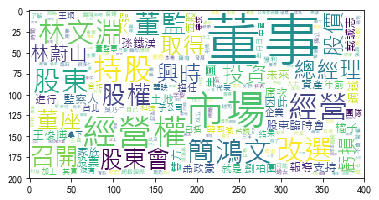

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [20]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('董事', 428),
 ('市場', 170),
 ('經營權', 118),
 ('持股', 84),
 ('經營', 82),
 ('改選', 71),
 ('林文淵', 69),
 ('簡鴻文', 69),
 ('股東', 67),
 ('董監', 56),
 ('股權', 52),
 ('召開', 47),
 ('股東會', 45),
 ('興時', 42),
 ('總經理', 41),
 ('董座', 41),
 ('取得', 40),
 ('投資', 39),
 ('股價', 38),
 ('林蔚山', 37),
 ('虧損', 34),
 ('股東臨時會', 33),
 ('土地', 31),
 ('孫鐵漢', 30),
 ('席次', 30),
 ('橘子', 30),
 ('集團', 30),
 ('家族', 29),
 ('未來', 29),
 ('報導', 28)]

In [21]:
data = []
for t in ten[:15]:
    data.append(t[1])
label = []
for t in ten[:15]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0x12b1b9e8>,
 <a list of 15 Text xticklabel objects>)

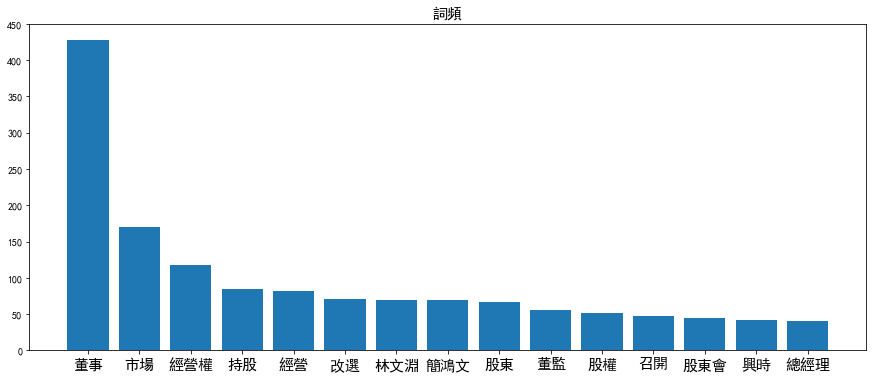

In [22]:
plt.figure(figsize=(15,6))
plt.bar(range(0,15),data)
plt.title("詞頻",fontsize=15)
plt.xticks(range(0,15),label,fontsize=15)

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-1.17698039e-01, -6.19939289e-02],
       [ 2.52390745e-02, -3.01000688e-01],
       [-7.17072191e-02, -3.01092274e-01],
       [-1.30675460e-01, -3.95129232e-01],
       [-6.72566024e-02, -2.16428621e-01],
       [-1.46957161e-01, -8.38213640e-02],
       [-1.05531032e-01, -1.41939019e-01],
       [-2.33361521e-01,  2.97140281e-01],
       [-2.45370184e-01,  2.59381004e-01],
       [-3.86244276e-01,  5.77175087e-01],
       [-2.13508156e-01,  2.59114298e-01],
       [-4.25460054e-02,  2.19126884e-01],
       [-3.56675299e-01,  5.41122477e-01],
       [-1.64395025e-01, -1.88449238e-01],
       [-1.28672010e-01, -1.79512968e-01],
       [-7.95708215e-02, -1.42901171e-01],
       [-1.05214179e-01, -1.78431414e-01],
       [-8.67341751e-02, -2.85464772e-01],
       [ 2.88700967e-02,  2.01463357e-02],
       [-6.80562543e-02, -2.83980614e-01],
       [-7.09513288e-02, -1.55859916e-01],
       [ 1.46538825e-02, -3.15312790e-02],
       [-1.21976380e-01, -1.65104945e-01],
       [-9.

No handles with labels found to put in legend.


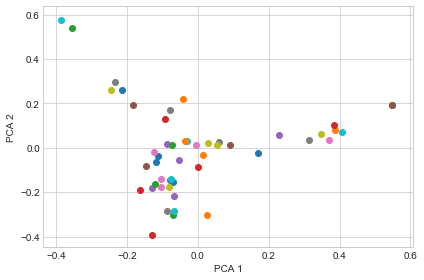

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

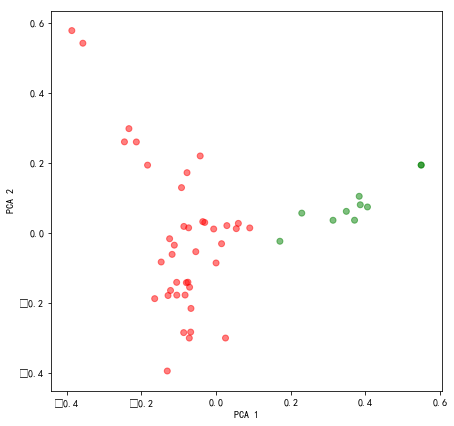

In [27]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()